In [521]:
import numpy as np
import scipy as sp
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tab
import dython as dt
from tabulate import tabulate
from pandas.plotting import scatter_matrix
from dython.nominal import associations


In [522]:
df = pd.read_csv('XY_train.csv',encoding='latin-1')
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,13163,city_16,0.910,NaN,No relevent experience,no_enrollment,High School,NaN,2,NaN,NaN,never,16,1
1,9357,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,6,1000-4999,Pvt Ltd,1,262,0
2,604,city_16,0.910,Male,No relevent experience,NaN,NaN,NaN,3,NaN,NaN,never,24,0
3,19033,city_16,0.910,Male,No relevent experience,no_enrollment,High School,NaN,3,NaN,NaN,1,35,0
4,4825,city_145,0.555,Male,Has relevent experience,Full time course,Graduate,STEM,4,NaN,NaN,1,43,1


#### No duplicate rows in DF

In [523]:
df.duplicated().sum()

0

## DF info

#### Checking for unique values and describe each column


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             15326 non-null  int64  
 1   city                    15326 non-null  object 
 2   city_development_index  15326 non-null  float64
 3   gender                  11687 non-null  object 
 4   relevent_experience     15326 non-null  object 
 5   enrolled_university     15015 non-null  object 
 6   education_level         14956 non-null  object 
 7   major_discipline        13089 non-null  object 
 8   experience              15278 non-null  object 
 9   company_size            10547 non-null  object 
 10  company_type            10383 non-null  object 
 11  last_new_job            14994 non-null  object 
 12  training_hours          15326 non-null  int64  
 13  target                  15326 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [525]:
for col in df.columns:
    print(str(col)+"-")
    print( )
    print(df[str(col)].unique())
    print( )
    print(df[str(col)].describe())
    print( )

enrollee_id-

[13163  9357   604 ... 25935  6525  3366]

count    15326.000000
mean     16887.713167
std       9612.278744
min          1.000000
25%       8594.750000
50%      17013.500000
75%      25186.000000
max      33380.000000
Name: enrollee_id, dtype: float64

city-

['city_16' 'city_136' 'city_145' 'city_160' 'city_84' 'city_139'
 'city_114' 'city_10' 'city_116' 'city_64' 'city_67' 'city_21' 'city_11'
 'city_103' 'city_173' 'city_28' 'city_59' 'city_98' 'city_115' 'city_150'
 'city_104' 'city_50' 'city_71' 'city_74' 'city_83' 'city_65' 'city_36'
 'city_100' 'city_53' 'city_41' 'city_69' 'city_159' 'city_73' 'city_19'
 'city_138' 'city_102' 'city_31' 'city_89' 'city_57' 'city_14' 'city_46'
 'city_27' 'city_175' 'city_141' 'city_90' 'city_61' 'city_75' 'city_142'
 'city_101' 'city_97' 'city_144' 'city_99' 'city_162' 'city_94' 'city_179'
 'city_26' 'city_39' 'city_111' 'city_123' 'city_72' 'city_152' 'city_134'
 'city_117' 'city_91' 'city_155' 'city_23' 'city_149' 'city_77' 'city_

In [526]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3639
relevent_experience          0
enrolled_university        311
education_level            370
major_discipline          2237
experience                  48
company_size              4779
company_type              4943
last_new_job               332
training_hours               0
target                       0
dtype: int64

#### Slicing extra string in variable city


In [527]:
df.city = df.city.str.slice(start=5)

### Drawing graphs of all the variable by themself


<ipython-input-528-4a60738a6802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.education_level[df.education_level=='Primary School'] = 'Primary'
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\peleg\a

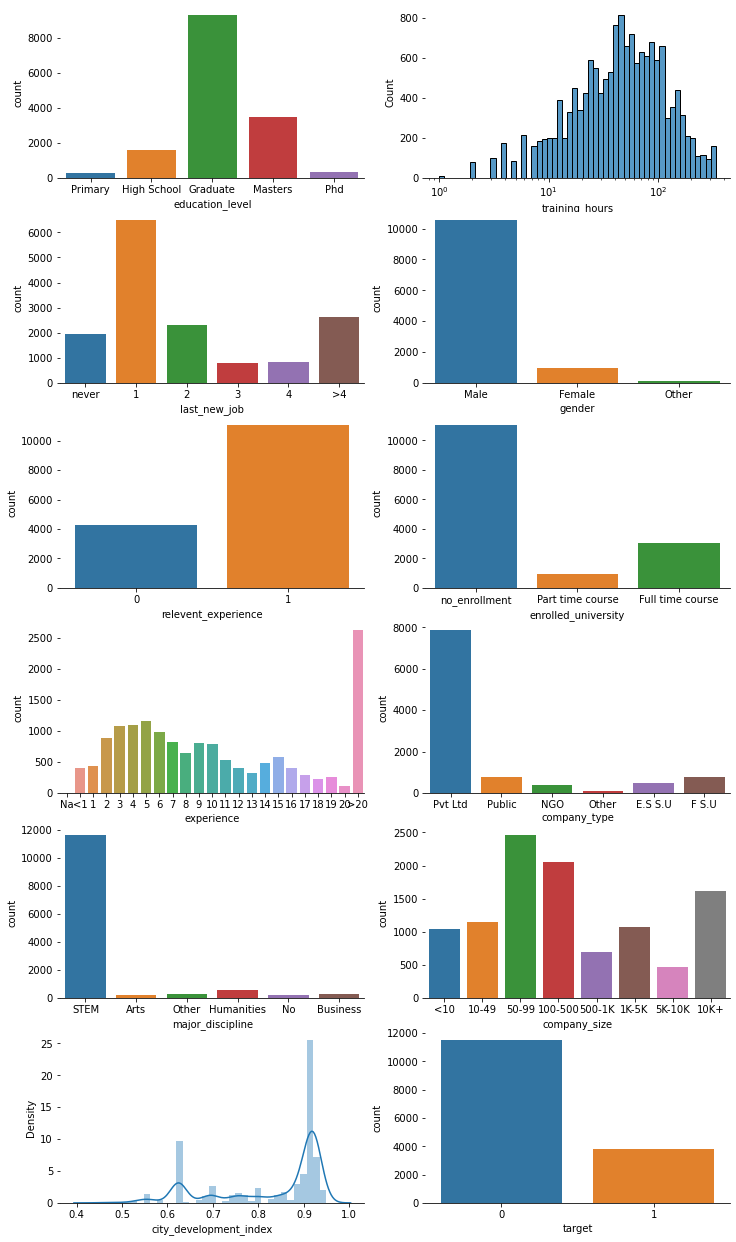

In [528]:
f, axes = plt.subplots(6, 2, figsize=(12,22))
sns.despine(left=True)

df.education_level[df.education_level=='Primary School'] = 'Primary'
sns.countplot(df.education_level,order= ['Primary','High School','Graduate','Masters','Phd'],ax=axes[0,0])
sns.histplot(df.training_hours,log_scale=True, ax=axes[0, 1])
sns.countplot(df.last_new_job,order= ['never','1','2','3','4','>4'],ax=axes[1, 0])
sns.countplot(df.gender,ax=axes[1,1])
sns.countplot(df.enrolled_university,order= ['no_enrollment','Part time course' ,'Full time course'],ax=axes[2, 1])

df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1
sns.countplot(df.relevent_experience,ax=axes[2, 0])
sns.countplot(df.experience, order= ['Na','<1', '1','2','3', '4', '5', '6','7', '8','9','10','11','12',
                                     '13','14','15','16','17','18','19','20', '>20'],ax=axes[3, 0])
df.company_type[df.company_type=='Early Stage Startup'] = 'E.S S.U'
df.company_type[df.company_type=='Public Sector'] = 'Public'
df.company_type[df.company_type=='Funded Startup'] = 'F S.U'
sns.countplot(df.company_type,ax=axes[3, 1])

df.major_discipline[df.major_discipline=='Business Degree'] = 'Business'
df.major_discipline[df.major_discipline=='No Major'] = 'No'
sns.countplot(df.major_discipline,ax=axes[4, 0])
df.company_size[df.company_size=='àå÷-49' ] = '10-49'
df.company_size[df.company_size=='500-999'] = '500-1K'
df.company_size[df.company_size=='1000-4999'] = '1K-5K'
df.company_size[df.company_size=='5000-9999'] = '5K-10K'
df.company_size[df.company_size=='10000+'] = '10K+'
sns.countplot(df.company_size,order = ['<10','10-49','50-99','100-500','500-1K', '1K-5K','5K-10K','10K+'],ax=axes[4, 1])


sns.distplot(df.city_development_index,ax=axes[5, 0])

sns.countplot(df.target,ax=axes[5, 1])


plt.savefig('Exploratory data analysis.png')

df.relevent_experience[df.relevent_experience==0] = 'No relevent experience'
df.relevent_experience[df.relevent_experience==1] = 'Has relevent experience'






<AxesSubplot:>

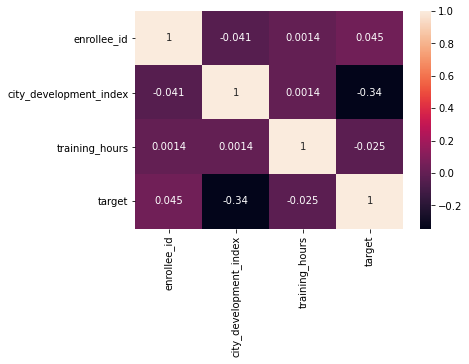

In [529]:
corrMatrix = df.corr(method='pearson')
sns.heatmap(corrMatrix, annot=True)

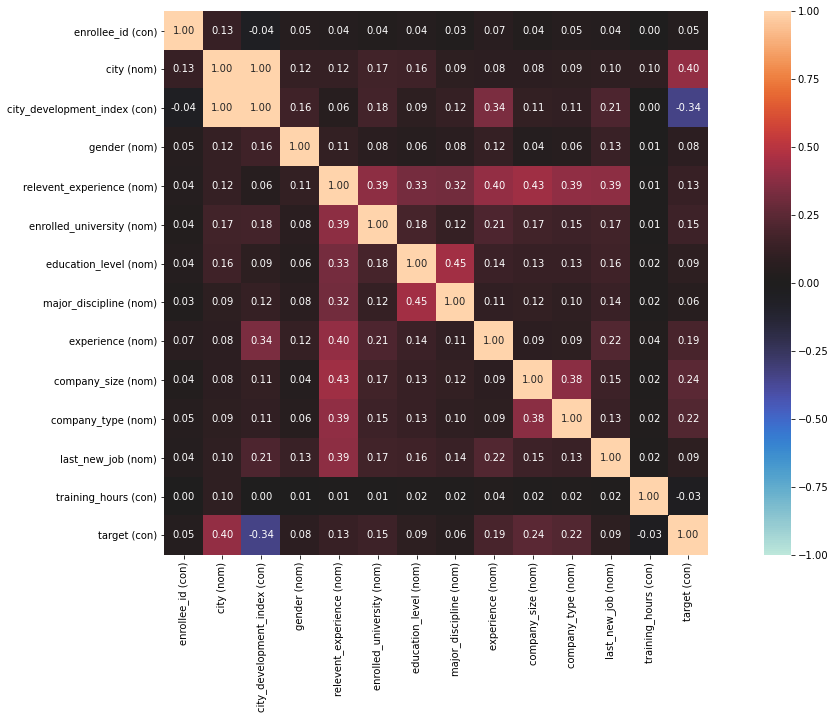

In [530]:
dt.nominal.associations(df,figsize=(20,10),mark_columns=True);

# Other Visualization with target variable

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


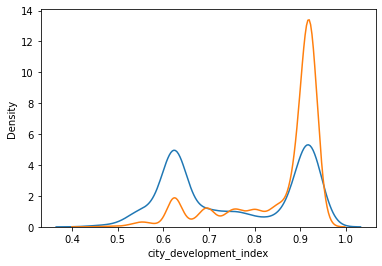

In [531]:
sns.distplot(df[df['target'] == 1]['city_development_index'],hist=False, kde=True, label='1')
sns.distplot(df[df['target'] == 0]['city_development_index'], hist=False, kde=True, label='0')
plt.show()

C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\peleg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


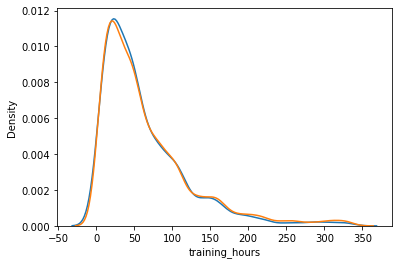

In [532]:
sns.distplot(df[df['target'] == 1]['training_hours'],hist=False, kde=True, label='1')
sns.distplot(df[df['target'] == 0]['training_hours'], hist=False, kde=True, label='0')
plt.show()

<AxesSubplot:xlabel='target,relevent_experience'>

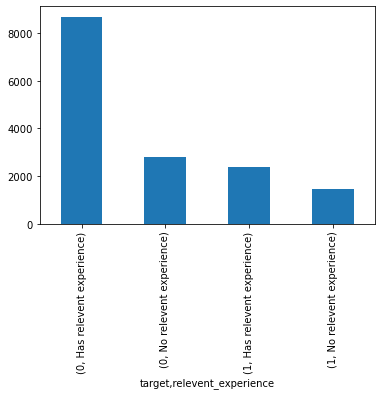

In [533]:
df.groupby(["target","relevent_experience"]).count()["enrollee_id"].plot(kind="bar")

## Pre-processing
## Dealing with missing values
#### "gender", "company_size", "company_type" - I added an unknown category
#### "enrolled_university", "major_discipline", "education_level", "last_new_job" - fillna with the mode value: "no_enrollment", "STEM"

In [534]:
df["gender"] = df["gender"].fillna("unknown")
df["company_size"] = df["company_size"].fillna("unknown")
df["company_type"] = df["company_type"].fillna("unknown")
print(df["enrolled_university"].mode())
df["enrolled_university"] = df["enrolled_university"].fillna("no_enrollment")
print(df["major_discipline"].mode())
df["major_discipline"] = df["major_discipline"].fillna("STEM")
print(df["last_new_job"].mode())
df["last_new_job"] = df["last_new_job"].fillna("1")
print(df["education_level"].mode())
df["education_level"] = df["education_level"].fillna("Graduate")

0    no_enrollment
dtype: object
0    STEM
dtype: object
0    1
dtype: object
0    Graduate
dtype: object


### "experience" - cut to 4 level ("low", "low-middle", "middle-high", "high")


In [535]:
print(df["experience"].unique())
df["experience"] = df["experience"].replace("<1","1")
df["experience"] = df["experience"].replace(">20","20")
df["experience"] = pd.to_numeric(df["experience"])
print(df["experience"].unique())
print(df["experience"].mode())
df["experience"] = df["experience"].fillna(20)
print(df["experience"].value_counts())
bins = [0,5,9,15,20]
labels = ["low", "low-middle", "middle-high", "high"]
df["experience"] = pd.cut(df["experience"], bins= bins, labels= labels)
print(df["experience"].value_counts())

## experience
df["experience"] = df["experience"].replace("low",0)
df["experience"] = df["experience"].replace("low-middle",1)
df["experience"] = df["experience"].replace("middle-high",2)
df["experience"] = df["experience"].replace("high",3)



['2' '6' '3' '4' '>20' '13' '19' '10' '1' '5' '7' '20' '14' '16' '12' '15'
 '8' '<1' '17' '9' '11' '18' nan]
[ 2.  6.  3.  4. 20. 13. 19. 10.  1.  5.  7. 14. 16. 12. 15.  8. 17.  9.
 11. 18. nan]
0    20.0
dtype: float64
20.0    2783
5.0     1161
4.0     1097
3.0     1084
6.0      979
2.0      889
1.0      841
7.0      825
9.0      804
10.0     789
8.0      636
15.0     572
11.0     525
14.0     478
16.0     403
12.0     393
13.0     313
17.0     282
19.0     249
18.0     223
Name: experience, dtype: int64
low            5072
high           3940
low-middle     3244
middle-high    3070
Name: experience, dtype: int64


df.isna().sum()

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             15326 non-null  int64   
 1   city                    15326 non-null  object  
 2   city_development_index  15326 non-null  float64 
 3   gender                  15326 non-null  object  
 4   relevent_experience     15326 non-null  object  
 5   enrolled_university     15326 non-null  object  
 6   education_level         15326 non-null  object  
 7   major_discipline        15326 non-null  object  
 8   experience              15326 non-null  category
 9   company_size            15326 non-null  object  
 10  company_type            15326 non-null  object  
 11  last_new_job            15326 non-null  object  
 12  training_hours          15326 non-null  int64   
 13  target                  15326 non-null  int64   
dtypes: category(1), float6

# Feature Representation

### Binary Variable

In [537]:
df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1

<ipython-input-537-68b9d7cc5e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='No relevent experience'] = 0
<ipython-input-537-68b9d7cc5e03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.relevent_experience[df.relevent_experience=='Has relevent experience'] = 1


### LabelEncoder - Order is important

In [538]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#! pip install category_encoders


In [539]:
cols = ["education_level", "experience", "last_new_job", "company_size", "enrolled_university"]

## education_level
encoder= ce.OrdinalEncoder(cols=['education_level'],return_df=True,
                           mapping=[{'col':'education_level',
'mapping':{'Primary':0,'High school':1,'Graduate':2,'Masters':3,'Phd':4,}}])
df['education_level'] = encoder.fit_transform(df['education_level'])
df["education_level"] = df["education_level"].replace(-1,1)

## enrolled_university
encoder= ce.OrdinalEncoder(cols=['enrolled_university'],return_df=True,
                           mapping=[{'col':'enrolled_university',
'mapping':{'no_enrollment':0,'Part time course':1,'Full time course':2,}}])
df['enrolled_university'] = encoder.fit_transform(df['enrolled_university'])

## last_new_job
encoder= ce.OrdinalEncoder(cols=['last_new_job'],return_df=True,
                           mapping=[{'col':'last_new_job',
'mapping':{'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}}])
df['last_new_job'] = encoder.fit_transform(df['last_new_job'])

## company_size
encoder= ce.OrdinalEncoder(cols=['company_size'],return_df=True,
                           mapping=[{'col':'company_size',
'mapping':{'unknown':0,'<10':1,'10-49':2,'50-99':3,'100-500':4,'500-1K':5,'1K-5K':6,'5K-10K':7,'10K+':8}}])
df['company_size'] = encoder.fit_transform(df['company_size'])



## Get Dummies - Order is Not important

In [540]:
## gender
encoder=ce.OneHotEncoder(cols='gender',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.gender)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="gender")
df.head(10)

## major_discipline
encoder=ce.OneHotEncoder(cols='major_discipline',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.major_discipline)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="major_discipline")

## company_type
encoder=ce.OneHotEncoder(cols='company_type',return_df=True,use_cat_names=True)
df_encoded = encoder.fit_transform(df.company_type)
df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns="company_type")


In [541]:
df.head(20)

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,...,major_discipline_Humanities,major_discipline_No,major_discipline_Business,company_type_unknown,company_type_Pvt Ltd,company_type_Public,company_type_NGO,company_type_Other,company_type_E.S S.U,company_type_F S.U
0,13163,16,0.910,0,0,1.0,0,0,0,16,...,0,0,0,1,0,0,0,0,0,0
1,9357,136,0.897,1,0,3.0,1,6,1,262,...,0,0,0,0,1,0,0,0,0,0
2,604,16,0.910,0,0,2.0,0,0,0,24,...,0,0,0,1,0,0,0,0,0,0
3,19033,16,0.910,0,0,1.0,0,0,1,35,...,0,0,0,1,0,0,0,0,0,0
4,4825,145,0.555,1,2,2.0,0,0,1,43,...,0,0,0,1,0,0,0,0,0,0
5,3759,136,0.897,1,0,3.0,3,5,2,18,...,0,0,0,0,1,0,0,0,0,0
6,23234,160,0.920,1,0,2.0,1,1,2,29,...,0,0,0,0,1,0,0,0,0,0
7,32330,84,0.698,1,0,3.0,2,3,5,122,...,0,0,0,0,1,0,0,0,0,0
8,22965,139,0.487,1,0,3.0,3,0,1,52,...,0,0,0,1,0,0,0,0,0,0
9,28416,160,0.920,1,2,2.0,2,0,2,41,...,0,0,0,1,0,0,0,0,0,0


,gender_unknown,gender_Male,gender_Female,gender_Other
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   enrollee_id                  15326 non-null  int64   
 1   city                         15326 non-null  object  
 2   city_development_index       15326 non-null  float64 
 3   relevent_experience          15326 non-null  object  
 4   enrolled_university          15326 non-null  int32   
 5   education_level              15326 non-null  float64 
 6   experience                   15326 non-null  category
 7   company_size                 15326 non-null  int32   
 8   last_new_job                 15326 non-null  int32   
 9   training_hours               15326 non-null  int64   
 10  target                       15326 non-null  int64   
 11  gender_unknown               15326 non-null  int64   
 12  gender_Male                  15326 non-null  int64   
 13  g